In [73]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # adjust the configuration of the plots i will create


# read in the data

df = pd.read_csv('/Users/546672495qq.com/Desktop/Portofolio Project/movies.csv')


In [74]:
# look at the data

df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,19000000,Warner Bros.,United Kingdom,Stanley Kubrick,Drama,46998772,The Shining,R,1980-06-13,146,8.4,Jack Nicholson,927000,Stephen King,1980
1,4500000,Columbia Pictures,United States,Randal Kleiser,Adventure,58853106,The Blue Lagoon,R,1980-07-14,104,5.8,Brooke Shields,65000,Henry De Vere Stacpoole,1980
2,18000000,Lucasfilm,United States,Irvin Kershner,Action,538375067,Star Wars: Episode V - The Empire Strikes Back,PG,1980-06-15,124,8.7,Mark Hamill,1200000,Leigh Brackett,1980
3,3500000,Paramount Pictures,United States,Jim Abrahams,Comedy,83453539,Airplane!,PG,1980-06-16,88,7.7,Robert Hays,221000,Jim Abrahams,1980
4,6000000,Orion Pictures,United States,Harold Ramis,Comedy,39846344,Caddyshack,R,1980-06-17,98,7.3,Chevy Chase,108000,Brian Doyle-Murray,1980


In [75]:
# check if there is any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

budget - 0.0%
company - 0.0%
country - 0.0%
director - 0.0%
genre - 0.0%
gross - 0.0%
name - 0.0%
rating - 0.0%
released - 0.0%
runtime - 0.0%
score - 0.0%
star - 0.0%
votes - 0.0%
writer - 0.0%
year - 0.0%


In [76]:
# data type for my column

df.dtypes

budget        int64
company      object
country      object
director     object
genre        object
gross         int64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

In [54]:
# create correct year column

df['yearcorrect'] = df['released'].astype(str).str[:4]

In [77]:
df.sort_values(by=['gross'], inplace=False, ascending=False)
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,19000000,Warner Bros.,United Kingdom,Stanley Kubrick,Drama,46998772,The Shining,R,1980-06-13,146,8.4,Jack Nicholson,927000,Stephen King,1980
1,4500000,Columbia Pictures,United States,Randal Kleiser,Adventure,58853106,The Blue Lagoon,R,1980-07-14,104,5.8,Brooke Shields,65000,Henry De Vere Stacpoole,1980
2,18000000,Lucasfilm,United States,Irvin Kershner,Action,538375067,Star Wars: Episode V - The Empire Strikes Back,PG,1980-06-15,124,8.7,Mark Hamill,1200000,Leigh Brackett,1980
3,3500000,Paramount Pictures,United States,Jim Abrahams,Comedy,83453539,Airplane!,PG,1980-06-16,88,7.7,Robert Hays,221000,Jim Abrahams,1980
4,6000000,Orion Pictures,United States,Harold Ramis,Comedy,39846344,Caddyshack,R,1980-06-17,98,7.3,Chevy Chase,108000,Brian Doyle-Murray,1980


In [78]:
# drop any duplicates

df.drop_duplicates()
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,19000000,Warner Bros.,United Kingdom,Stanley Kubrick,Drama,46998772,The Shining,R,1980-06-13,146,8.4,Jack Nicholson,927000,Stephen King,1980
1,4500000,Columbia Pictures,United States,Randal Kleiser,Adventure,58853106,The Blue Lagoon,R,1980-07-14,104,5.8,Brooke Shields,65000,Henry De Vere Stacpoole,1980
2,18000000,Lucasfilm,United States,Irvin Kershner,Action,538375067,Star Wars: Episode V - The Empire Strikes Back,PG,1980-06-15,124,8.7,Mark Hamill,1200000,Leigh Brackett,1980
3,3500000,Paramount Pictures,United States,Jim Abrahams,Comedy,83453539,Airplane!,PG,1980-06-16,88,7.7,Robert Hays,221000,Jim Abrahams,1980
4,6000000,Orion Pictures,United States,Harold Ramis,Comedy,39846344,Caddyshack,R,1980-06-17,98,7.3,Chevy Chase,108000,Brian Doyle-Murray,1980


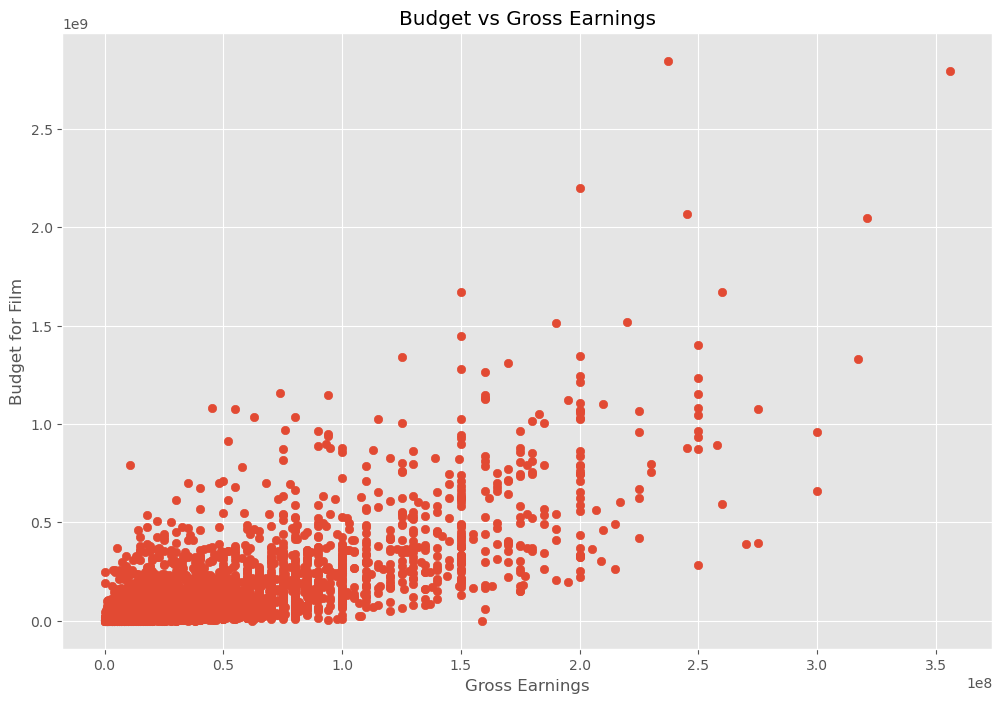

In [62]:
# scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')

plt.ylabel('Budget for Film')

plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

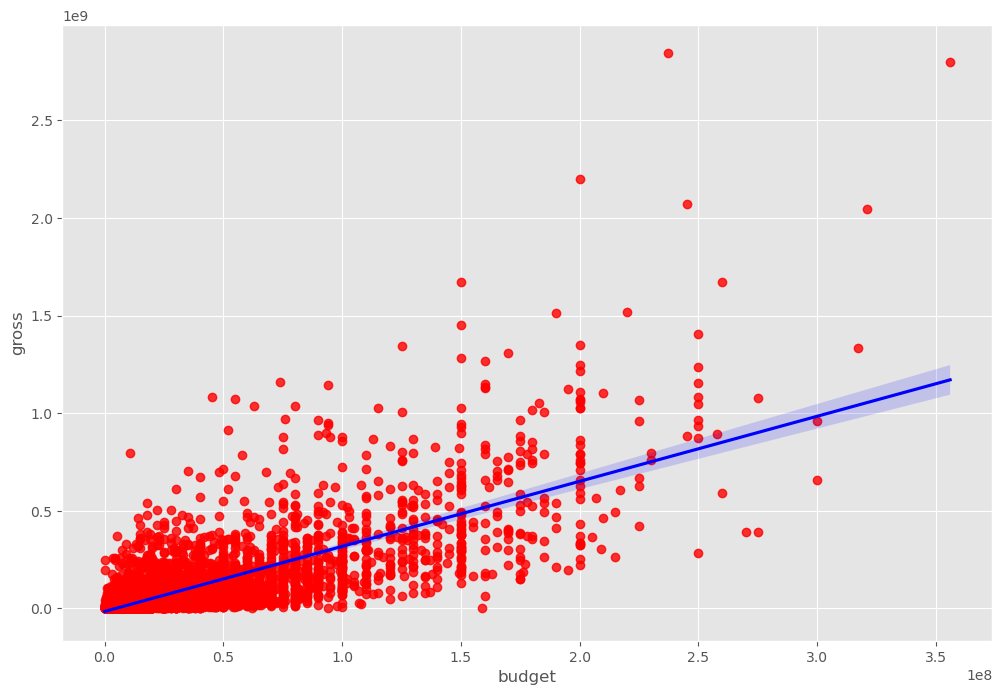

In [63]:
# plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [64]:
# looking at correlation

# Correlation Matrix between all numeric columns

df.corr(method ='pearson')

,budget,gross,runtime,score,votes,year
budget,1.000000,0.740247,0.318695,0.072001,0.439675,0.327722
gross,0.740247,1.000000,0.275796,0.222556,0.614751,0.274321
runtime,0.318695,0.275796,1.000000,0.414068,0.352303,0.075077
score,0.072001,0.222556,0.414068,1.000000,0.474256,0.056386
votes,0.439675,0.614751,0.352303,0.474256,1.000000,0.206021
year,0.327722,0.274321,0.075077,0.056386,0.206021,1.000000


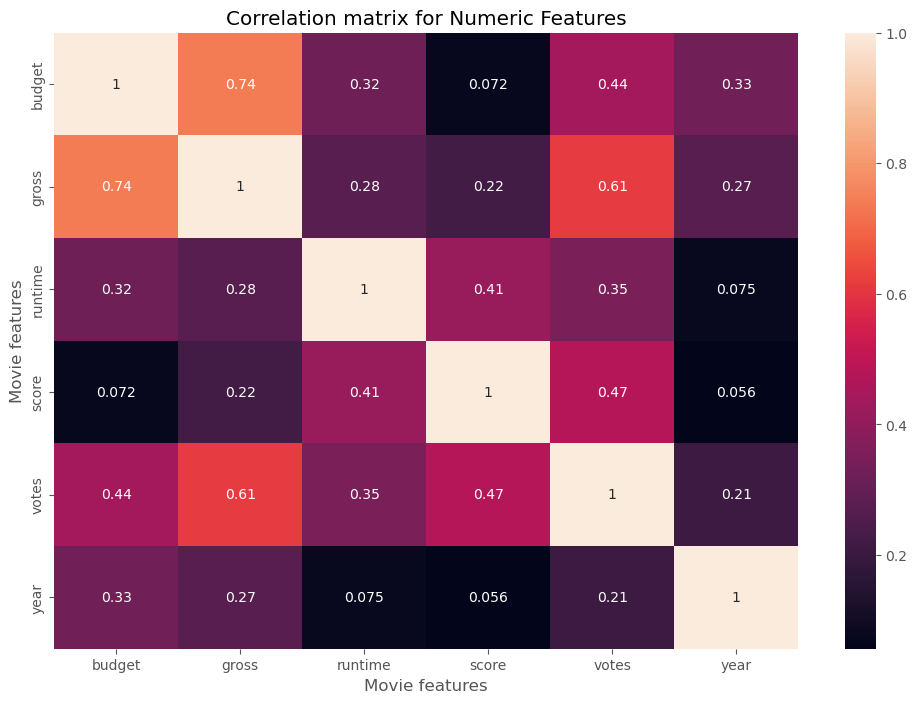

In [65]:
# high correlation between budget and gross
correlation_matrix = df.corr(method ='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [66]:
# looking at company

df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
3731,237000000,Twentieth Century Fox,United States,James Cameron,Action,2847246203,Avatar,PG-13,1990-08-31,162,7.8,Sam Worthington,1100000,James Cameron,2009,1990
5302,356000000,Marvel Studios,United States,Anthony Russo,Action,2797501328,Avengers: Endgame,PG-13,1994-12-19,181,8.4,Robert Downey Jr.,903000,Christopher Markus,2019,1994
1795,200000000,Twentieth Century Fox,United States,James Cameron,Drama,2201647264,Titanic,PG-13,1985-05-13,194,7.8,Leonardo DiCaprio,1100000,James Cameron,1997,1985
4730,245000000,Lucasfilm,United States,J.J. Abrams,Action,2069521700,Star Wars: Episode VII - The Force Awakens,PG-13,1993-05-26,138,7.8,Daisy Ridley,876000,Lawrence Kasdan,2015,1993
5158,321000000,Marvel Studios,United States,Anthony Russo,Action,2048359754,Avengers: Infinity War,PG-13,1994-07-28,149,8.4,Robert Downey Jr.,897000,Christopher Markus,2018,1994


In [79]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,19000000,1426,46,1795,6,46998772,4692,6,0,146,8.4,699,927000,2832,1980
1,4500000,452,47,1578,1,58853106,3929,6,30,104,5.8,214,65000,1158,1980
2,18000000,945,47,757,0,538375067,3641,4,1,124,8.7,1157,1200000,1818,1980
3,3500000,1108,47,889,4,83453539,204,4,2,88,7.7,1474,221000,1413,1980
4,6000000,1083,47,719,4,39846344,732,6,3,98,7.3,271,108000,351,1980


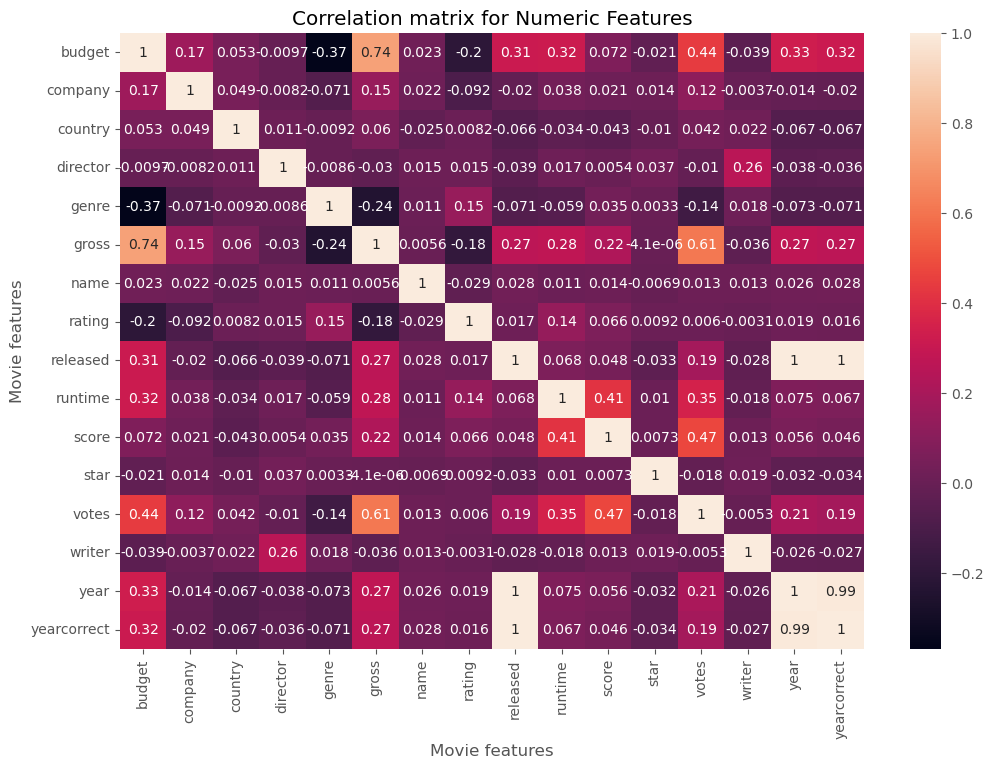

In [68]:
correlation_matrix = df.corr(method ='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [70]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

budget       budget         1.000000
             company        0.170235
             country        0.052977
             director      -0.009662
             genre         -0.368523
             gross          0.740247
             name           0.023392
             rating        -0.203946
             released       0.314769
             runtime        0.318695
             score          0.072001
             star          -0.021473
             votes          0.439675
             writer        -0.039466
             year           0.327722
             yearcorrect    0.315374
company      budget         0.170235
             company        1.000000
             country        0.048569
             director      -0.008223
             genre         -0.071334
             gross          0.149553
             name           0.021697
             rating        -0.092357
             released      -0.020188
             runtime        0.037585
             score          0.020656
 

In [71]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)


genre        budget        -0.368523
budget       genre         -0.368523
genre        gross         -0.244101
gross        genre         -0.244101
rating       budget        -0.203946
budget       rating        -0.203946
rating       gross         -0.181906
gross        rating        -0.181906
genre        votes         -0.135990
votes        genre         -0.135990
rating       company       -0.092357
company      rating        -0.092357
year         genre         -0.073167
genre        year          -0.073167
             company       -0.071334
company      genre         -0.071334
genre        released      -0.070938
released     genre         -0.070938
genre        yearcorrect   -0.070930
yearcorrect  genre         -0.070930
country      yearcorrect   -0.066772
yearcorrect  country       -0.066772
year         country       -0.066748
country      year          -0.066748
             released      -0.066463
released     country       -0.066463
runtime      genre         -0.059237
g

In [72]:
# looking at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

votes        gross          0.614751
gross        votes          0.614751
budget       gross          0.740247
gross        budget         0.740247
yearcorrect  year           0.994316
year         yearcorrect    0.994316
released     year           0.996401
year         released       0.996401
yearcorrect  released       0.997728
released     yearcorrect    0.997728
budget       budget         1.000000
writer       writer         1.000000
votes        votes          1.000000
star         star           1.000000
score        score          1.000000
runtime      runtime        1.000000
released     released       1.000000
rating       rating         1.000000
name         name           1.000000
gross        gross          1.000000
genre        genre          1.000000
director     director       1.000000
country      country        1.000000
company      company        1.000000
year         year           1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64


In [ ]:
# voted and budget have the highest corrrelation to gross earnings